In [1]:
import pandas as pd
import numpy as np
import itertools
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering, KMeans, OPTICS


### Prediction on Rating0 differenciated by Match and no Match on RETOS & BEBRASK


In [2]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Delta.xlsx")
data #FALTA RENOMBRAR COLUMNAS Y AÑADIR LA COLUMNA SUJETO

,Subject,Delta_Happy_1_1,Delta_Happy_1_2,Delta_Happy_1_3,Delta_Happy_1_4,Delta_Sad_1_1,Delta_Sad_1_2,Delta_Sad_1_3,Delta_Sad_1_4,Delta_Fear_1_1,Delta_Fear_1_2,Delta_Fear_1_3,Delta_Fear_1_4
0,PREDWELL_RETOS-1-1,-0.833333,0.000000,0.111111,0.722222,-0.500000,0.111111,-0.111111,0.500000,-0.500000,0.166667,-0.055556,0.388889
1,PREDWELL_RETOS-10-1,-0.666667,-0.222222,0.444444,0.444444,-0.333333,-0.055556,0.388889,0.000000,-0.055556,-0.388889,0.166667,0.277778
2,PREDWELL_RETOS-101-1,-0.833333,-0.055556,0.222222,0.666667,-0.555556,0.055556,0.388889,0.111111,-0.611111,-0.055556,0.333333,0.333333
3,PREDWELL_RETOS-102-1,-0.888889,0.000000,0.444444,0.444444,-0.222222,0.055556,0.222222,-0.055556,-0.666667,-0.111111,0.333333,0.444444
4,PREDWELL_RETOS-103-1,-0.833333,-0.055556,0.111111,0.777778,-0.833333,0.444444,0.277778,0.111111,-0.166667,-0.111111,0.166667,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-1124-1,-0.500000,-0.166667,0.222222,0.444444,-0.444444,0.111111,0.333333,0.000000,-0.722222,0.333333,0.388889,0.000000
145,PREDWELL_RETOS-1125-1,-0.833333,-0.166667,0.333333,0.666667,-0.833333,0.333333,0.388889,0.111111,-0.222222,-0.166667,0.055556,0.333333
146,PREDWELL_RETOS-1126-1,-1.000000,0.111111,0.222222,0.666667,-0.277778,-0.055556,-0.111111,0.444444,-0.500000,0.333333,-0.055556,0.222222
147,PREDWELL_RETOS-1127-1,-0.666667,-0.333333,0.222222,0.777778,-0.500000,0.000000,0.166667,0.333333,-0.222222,-0.166667,-0.055556,0.444444


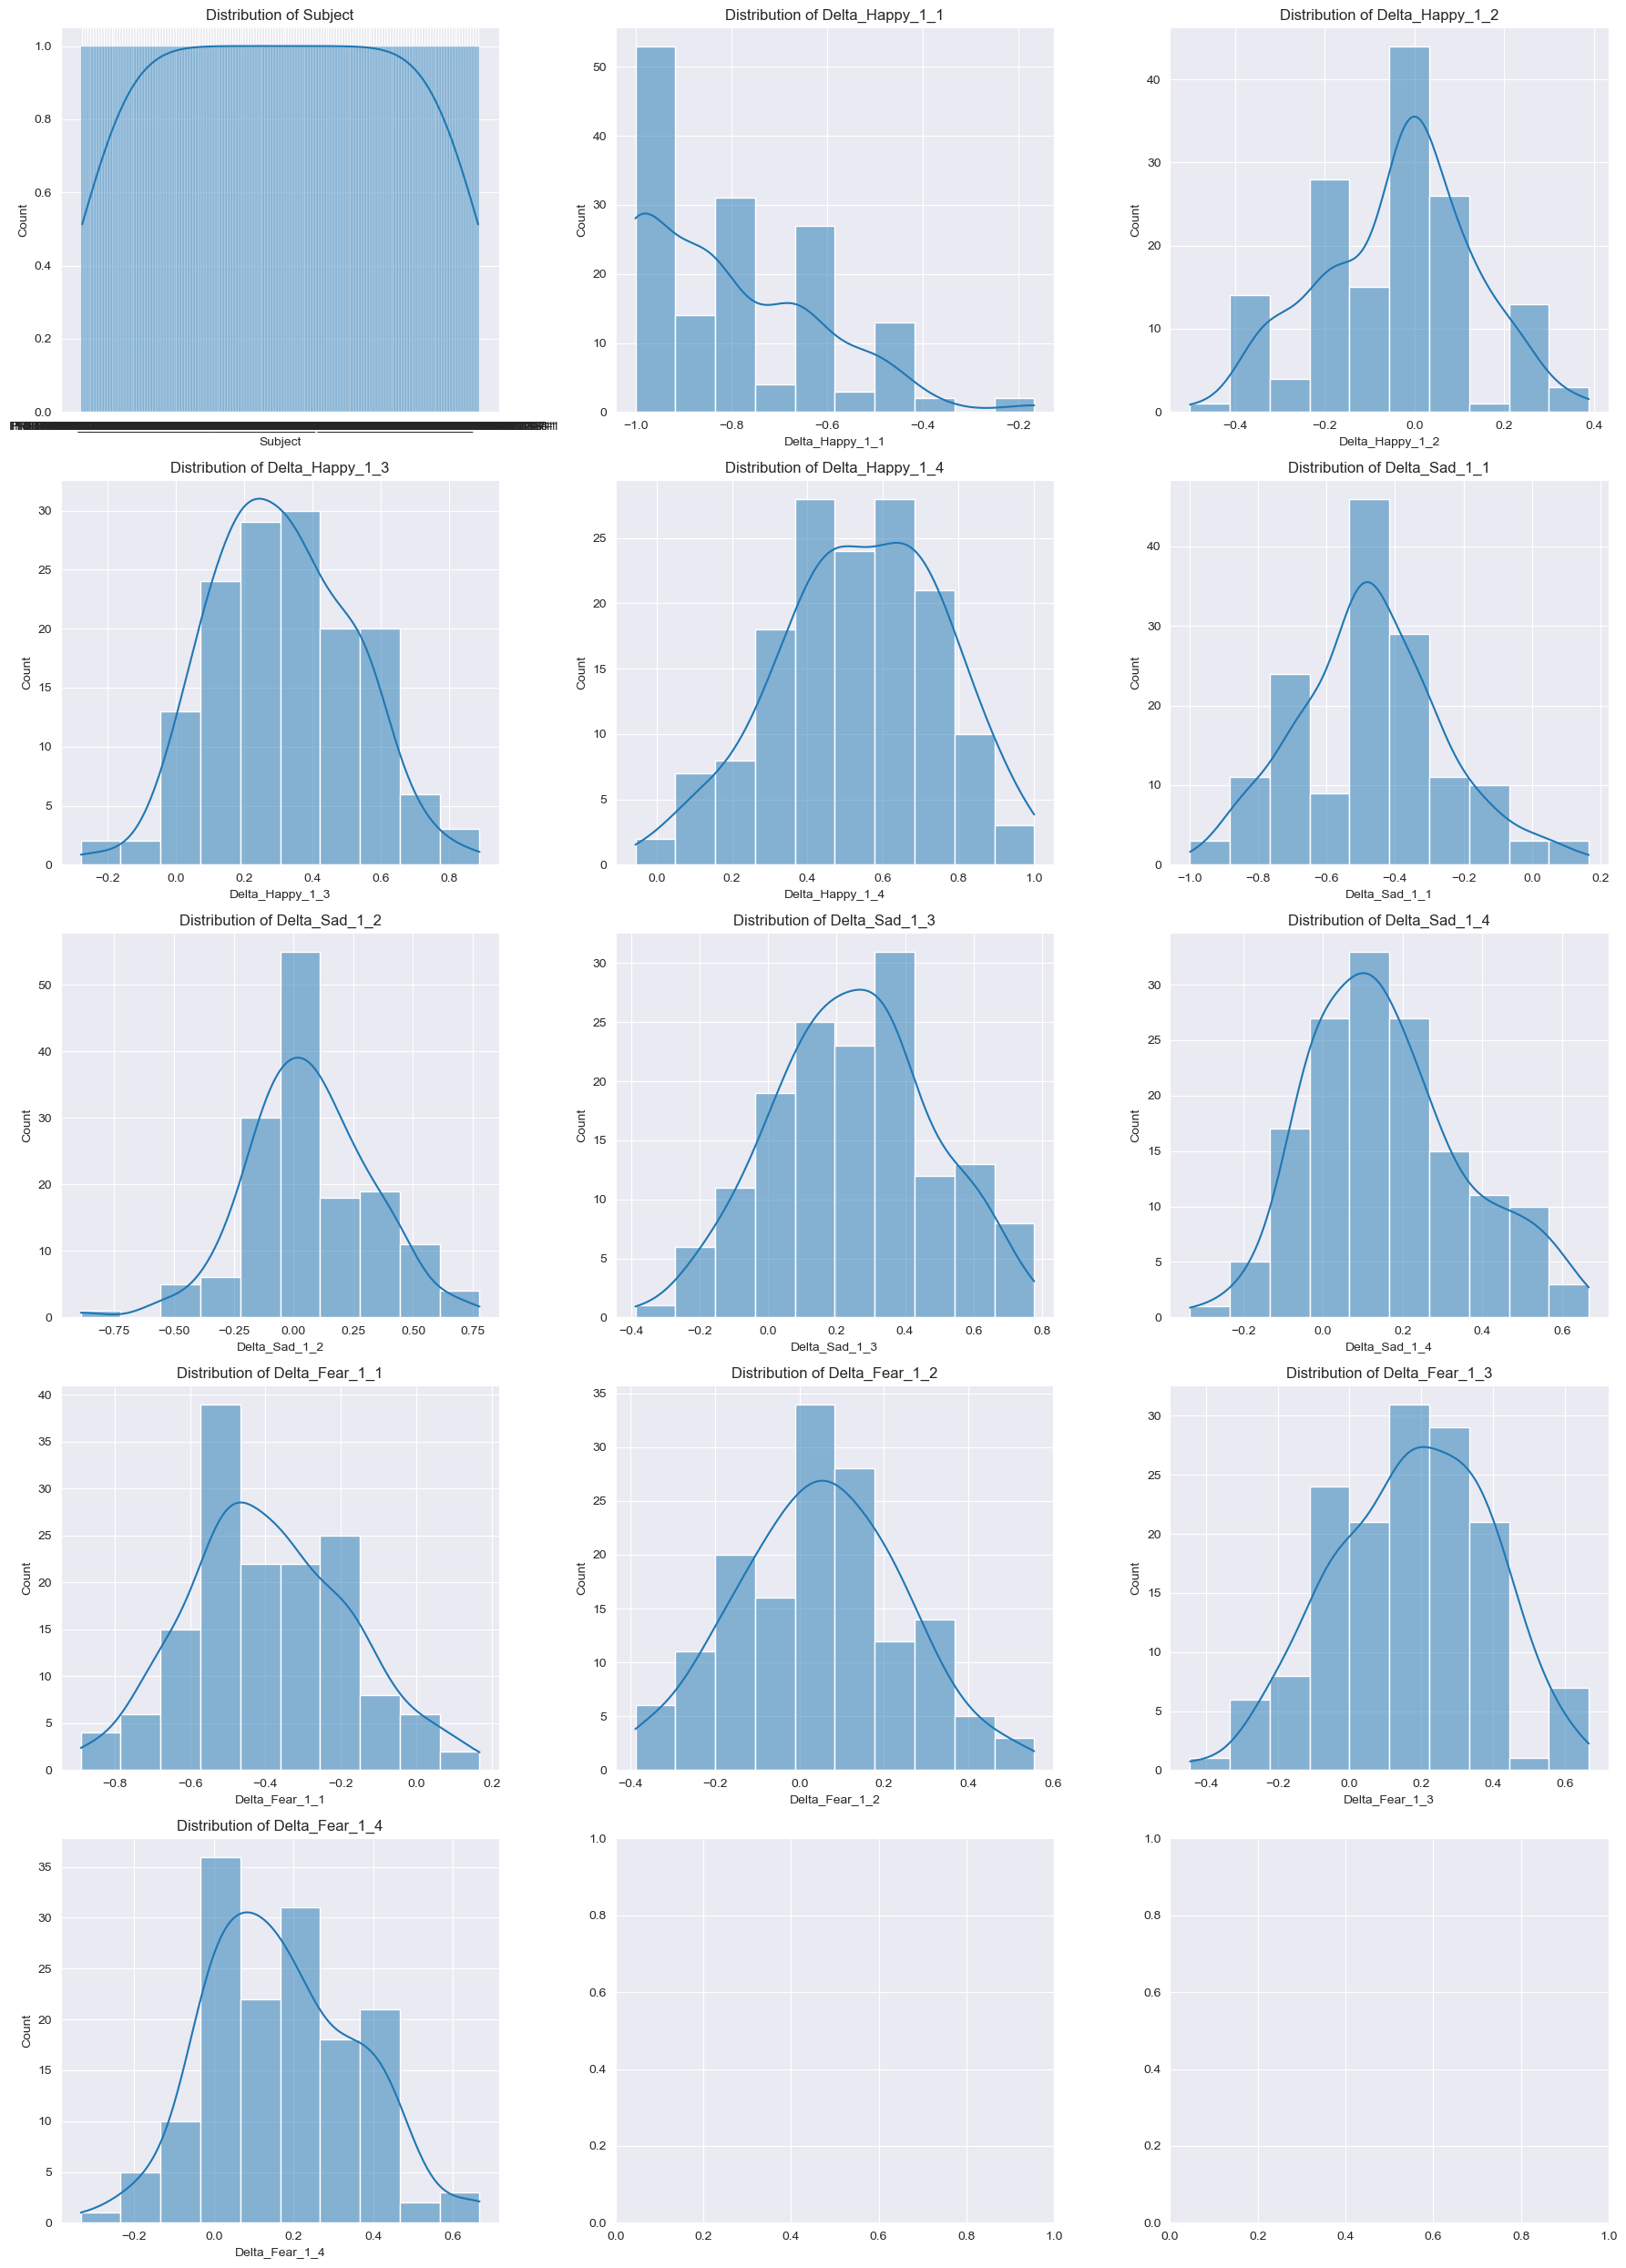

In [3]:
warnings.filterwarnings('ignore', category=FutureWarning)

# Determinamos cuántos subgráficos necesitamos
n_cols = 3  # Número de subgráficos por fila
n_rows = int(np.ceil(len(data.columns) / n_cols))

# Configuramos la figura
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))

# Iteramos sobre cada columna y generamos el gráfico correspondiente
for i, col in enumerate(data):
    ax = axes[i // n_cols, i % n_cols]

    
    sns.histplot(data[col], bins=10, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Ajustamos el layout y mostramos el gráfico
plt.tight_layout()
plt.show()
#### Correlación de las variables


Excepto por el Delta de Happy 1, todas las variables se asemejan a una normal (con diferentes mu y sigma)

#### Correlación de las variables


In [4]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de correlación')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


ValueError: could not convert string to float: 'PREDWELL_RETOS-1-1'

Podemos observar correlación negativa entre puntuaciones vecinas (los cuadrados 2x2 que se muestran) y correlación positiva entre diferentes emociones con misma puntuación (lo que nos puede llevar a pensar que los participantes suelen seguir una misma dinámica al puntuar).

## Clustering

#### Hierarchical Clustering

In [15]:
scaler = StandardScaler()
X  = scaler.fit_transform(data)

silhouette = []
db = []
for n in range(2,12):
    clustering = AgglomerativeClustering(n_clusters=n,linkage="complete").fit(X)
    silhouette.append(silhouette_score(X, clustering.labels_))
    db.append(davies_bouldin_score(X, clustering.labels_))


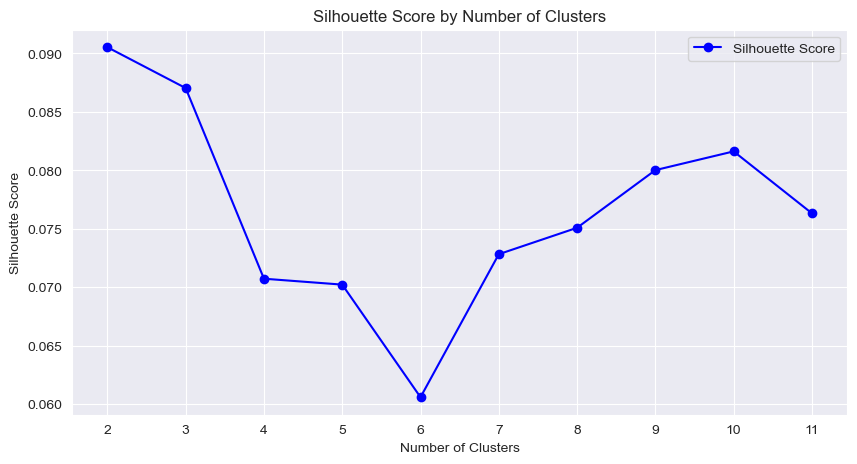

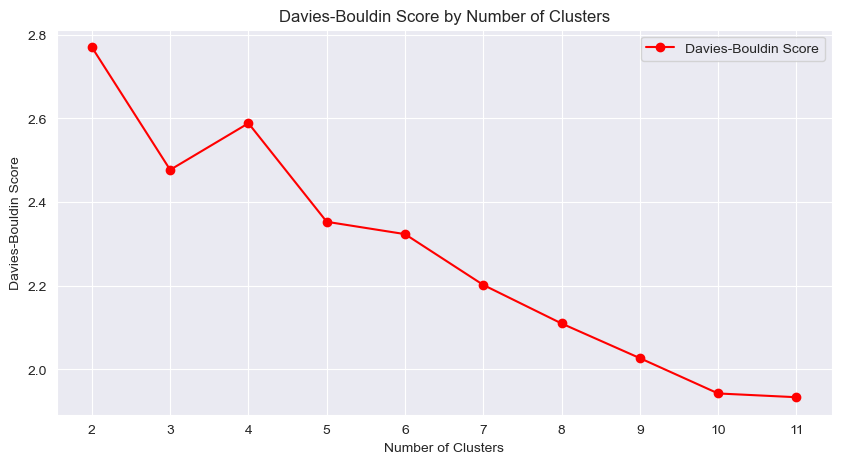

In [16]:
# Assuming silhouette and db lists are filled with scores for cluster numbers from 2 to 11
cluster_range = range(2, 12)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

# Plotting the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, db, marker='o', linestyle='-', color='red', label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()


In [20]:
clustering = AgglomerativeClustering(n_clusters=10,linkage="complete").fit(X)
hierarchical_cluster_labels = clustering.labels_


#### Optics

In [17]:
silhouette = []
db = []
for n in range(2, 6):
    clustering = OPTICS(min_samples=n, metric="minkowski", algorithm="brute").fit(X)
    silhouette.append(silhouette_score(X, clustering.labels_))
    db.append(davies_bouldin_score(X, clustering.labels_))



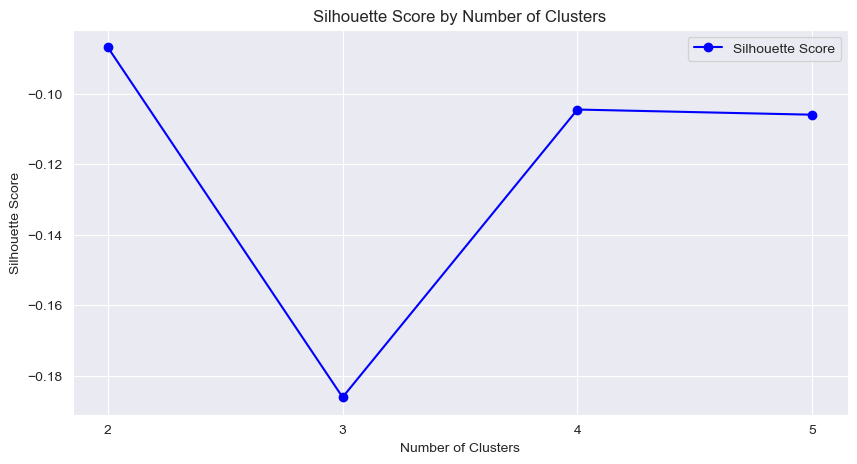

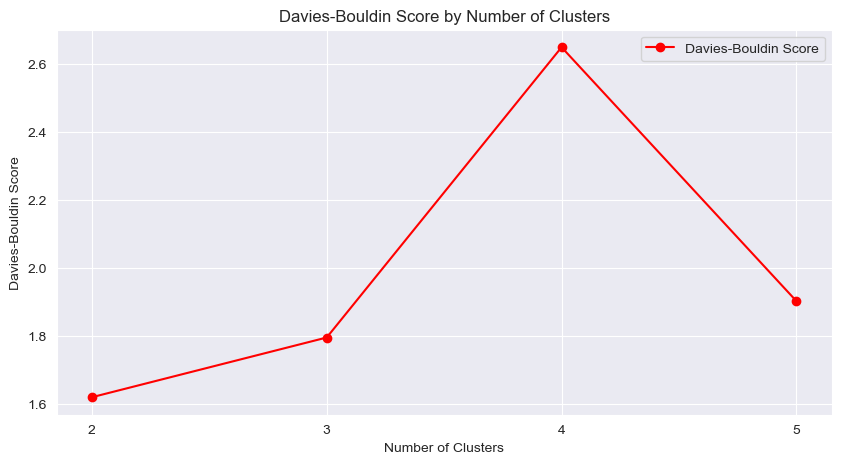

In [18]:
# Assuming silhouette and db lists are filled with scores for cluster numbers from 2 to 11
cluster_range = range(2, 6)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

# Plotting the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, db, marker='o', linestyle='-', color='red', label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()


#### KMeans

In [23]:
warnings.filterwarnings('ignore', category=UserWarning)

silhouette = []
db = []
for n in range(2,12):
    clustering = KMeans(n_clusters=n,init = "k-means++").fit(X)
    silhouette.append(silhouette_score(X, clustering.labels_))
    db.append(davies_bouldin_score(X, clustering.labels_))


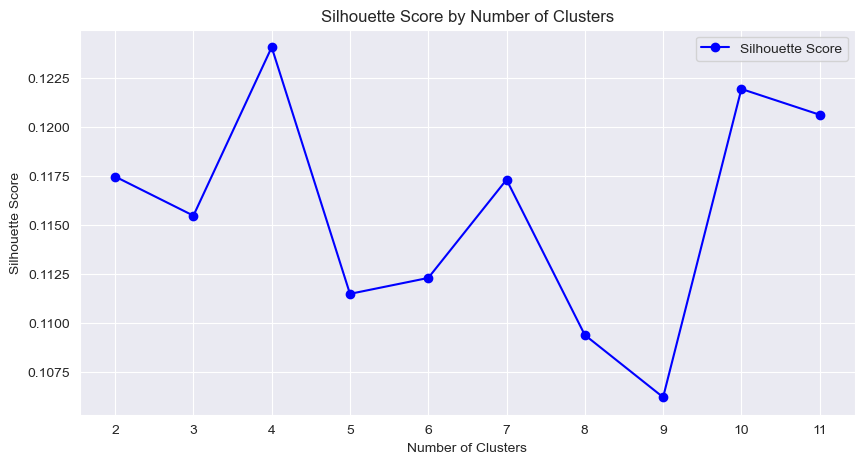

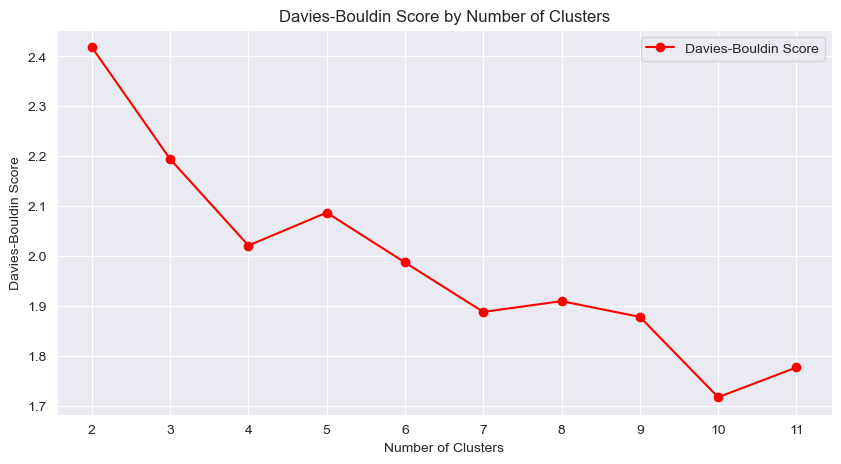

In [24]:
# Assuming silhouette and db lists are filled with scores for cluster numbers from 2 to 11
cluster_range = range(2, 12)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette, marker='o', linestyle='-', color='blue', label='Silhouette Score')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()

# Plotting the Davies-Bouldin scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, db, marker='o', linestyle='-', color='red', label='Davies-Bouldin Score')
plt.title('Davies-Bouldin Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.legend()
plt.grid(True)
plt.xticks(cluster_range)
plt.show()


In [ ]:
clustering = KMeans(n_clusters=10, init="k-means++").fit(X)
KMeans_cluster_labels = clustering.labels_